# 1.导入需要的包

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

# 2.导入需要的数据集

In [2]:
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# 3.sklearn 建模的基本流程

In [3]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(wine.data,wine.target,test_size=0.3,random_state=42)

clf = DecisionTreeClassifier(random_state=0)

rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(xtrain,ytrain)
rfc = rfc.fit(xtrain,ytrain)
score_c = clf.score(xtest,ytest)
score_r = rfc.score(xtest,ytest)

print("single tree:{}".format(score_c),"Random Forest:{}".format(score_r))

single tree:0.9629629629629629 Random Forest:1.0


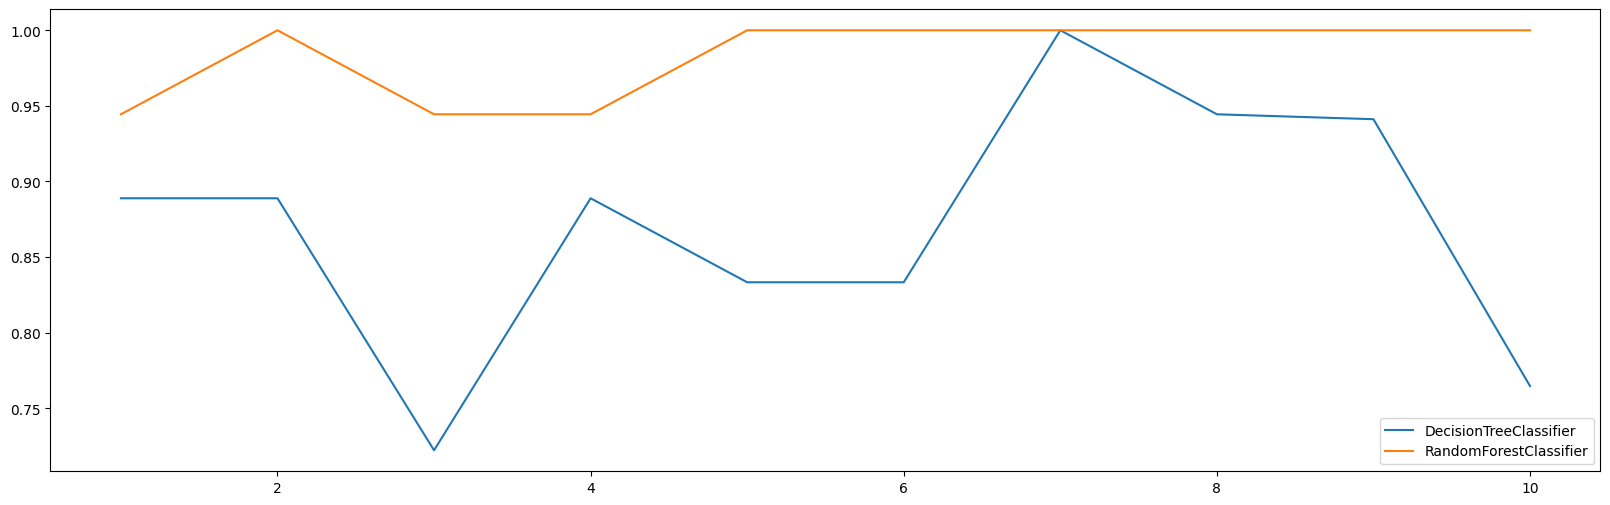

In [4]:
# 4画出随机森林和决策树在一组交叉验证的效果对比
#交叉验证：将数据集划分成n份，依次取一份做测试集，n-1作为训练集，多次训练模型以观测模型的稳定性
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(random_state=0)
clf_c = cross_val_score(clf,wine.data,wine.target,cv=10)

rfc = RandomForestClassifier(random_state=0)

rfc_c = cross_val_score(rfc,wine.data,wine.target,cv=10)
plt.figure(figsize=[20,6])
plt.plot(range(1,11),clf_c,label='DecisionTreeClassifier')
plt.plot(range(1,11),rfc_c,label='RandomForestClassifier')
plt.legend(loc=4)

# 5.画出随机森林和决策树在十组交叉验证下的效果对比

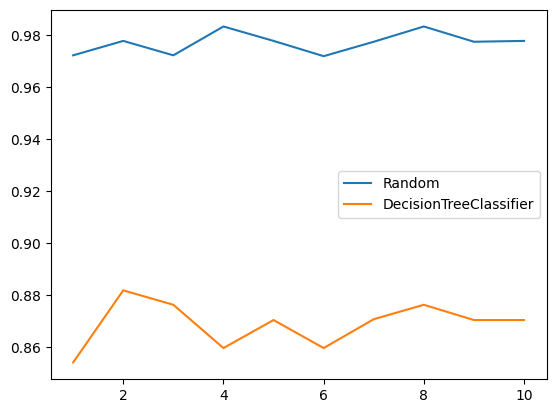

In [5]:
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)

    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label='Random')
plt.plot(range(1,11),clf_l,label='DecisionTreeClassifier')
plt.legend()
plt.show()


# 6.n_estimators 的学习曲线

0.9944444444444445 13


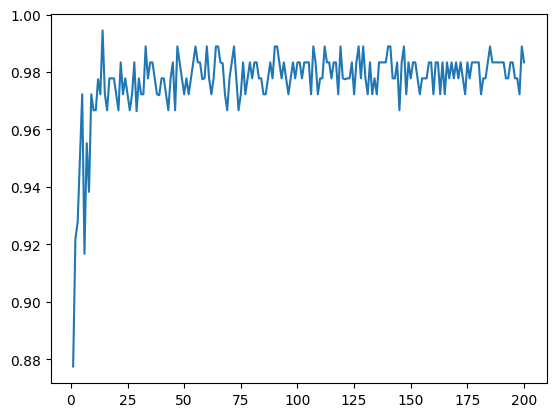

In [7]:
supera=[]
for i in range(1,201):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    supera.append(rfc_s)
print(max(supera),supera.index(max(supera)))
plt.plot(range(1,201),supera,label='Random')

# random_state
随机森林的基评估器是决策树，

In [18]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(xtrain,ytrain)

#随机森林的重要属性之一：estimators,查看森林中树的状况
#rfc.estimators_[0]
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


# bootstrap & oob_score
bootstrap = true 代表有放回的随机抽样

In [19]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

rfc.oob_score_

0.9719101123595506

# 重要的属性和接口

In [20]:
rfc = rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

1.0

In [21]:
rfc.feature_importances_

array([0.11475041, 0.01779602, 0.02504147, 0.08383   , 0.02864631,
       0.07426781, 0.09500107, 0.01309627, 0.01975203, 0.17698822,
       0.06353771, 0.14097428, 0.14631841])

In [27]:
rfc.predict_proba(xtest)

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.05, 0.15, 0.8 ],
       [0.9 , 0.1 , 0.  ],
       [0.05, 0.7 , 0.25],
       [0.95, 0.05, 0.  ],
       [0.05, 0.95, 0.  ],
       [0.05, 0.1 , 0.85],
       [0.05, 0.95, 0.  ],
       [0.35, 0.05, 0.6 ],
       [0.55, 0.45, 0.  ],
       [0.  , 0.15, 0.85],
       [0.8 , 0.2 , 0.  ],
       [0.1 , 0.6 , 0.3 ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.95, 0.05],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.9 , 0.1 , 0.  ],
       [0.  , 0.95, 0.05],
       [0.95, 0.05, 0.  ],
       [0.45, 0.55, 0.  ],
       [0.  , 0.75, 0.25],
       [0.  , 0.05, 0.95],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.2 , 0.65, 0.15],
       [0.05, 0.95, 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.1 , 0.05, 0.85],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.1 , 0.35, 0.55],
 

In [26]:
rfc.predict(xtest)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [28]:
rfc.predict_proba(xtest)

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.05, 0.15, 0.8 ],
       [0.9 , 0.1 , 0.  ],
       [0.05, 0.7 , 0.25],
       [0.95, 0.05, 0.  ],
       [0.05, 0.95, 0.  ],
       [0.05, 0.1 , 0.85],
       [0.05, 0.95, 0.  ],
       [0.35, 0.05, 0.6 ],
       [0.55, 0.45, 0.  ],
       [0.  , 0.15, 0.85],
       [0.8 , 0.2 , 0.  ],
       [0.1 , 0.6 , 0.3 ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.95, 0.05],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.9 , 0.1 , 0.  ],
       [0.  , 0.95, 0.05],
       [0.95, 0.05, 0.  ],
       [0.45, 0.55, 0.  ],
       [0.  , 0.75, 0.25],
       [0.  , 0.05, 0.95],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.2 , 0.65, 0.15],
       [0.05, 0.95, 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.1 , 0.05, 0.85],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.1 , 0.35, 0.55],
 

# 3 RandomForestRegressor

# 3.1 重要参数，属性与接口